Creating Data Array
[[ 0.00000000e+00  1.00000000e+00  2.00000000e+00 ...  1.58319600e+06
   1.58319700e+06  1.58319800e+06]
 [-3.11995810e+00 -3.10722061e+00 -3.09448312e+00 ...  2.47069041e+00
   2.48916619e+00  2.50764197e+00]
 [ 1.33790612e+01  1.34113712e+01  1.34436813e+01 ...  2.74126192e+00
   2.75016863e+00  2.75907533e+00]
 [-1.08602453e+01 -1.07706951e+01 -1.06811449e+01 ...  1.87826646e+00
   1.88065032e+00  1.88303418e+00]
 [-2.51246656e+01 -2.49305307e+01 -2.47363958e+01 ...  4.20218557e+00
   4.20897326e+00  4.21576095e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]
Creating new Dataframe
            F4-C4      C4-P4      P4-O2      C4-A1  Label
0       -3.119958  13.379061 -10.860245 -25.124666    0.0
1       -3.107221  13.411371 -10.770695 -24.930531    0.0
2       -3.094483  13.443681 -10.681145 -24.736396    0.0
3       -3.081746  13.475991 -10.591595 -24.542261    0.0
4       -3.069008  13.508301 -10.502

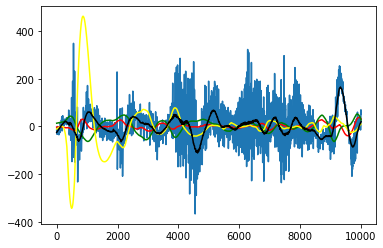

In [2]:
from pylab import *
import pandas as pd
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    # Unpickle file and view
    df = pd.read_pickle(r'C:/Users/Harry/Desktop/ECEC487/data/pickledDf.pkl')

    # Extract value from original Pickle dataframe
    labels = (df['Label'].to_numpy())
    x = (df.index.to_numpy()) # Index
    y1 = (df['F4-C4'].to_numpy()) # Signal
    y2 = (df['C4-P4'].to_numpy()) # Signal
    y3 = (df['P4-O2'].to_numpy()) # Signal
    y4 = (df['C4-A1'].to_numpy()) # Signal

    # Creating Figure
    yhat1 = scipy.signal.savgol_filter(y1, 251, 1) # window size 251, polynomial order 1
    yhat2 = scipy.signal.savgol_filter(y2, 251, 1) # window size 251, polynomial order 1
    yhat3 = scipy.signal.savgol_filter(y3, 251, 1) # window size 251, polynomial order 1
    yhat4 = scipy.signal.savgol_filter(y4, 251, 1) # window size 251, polynomial order 1
    
    plt.plot(x[:10000],y4[:10000])
    plt.plot(x[:10000],yhat1[:10000], color='red')
    plt.plot(x[:10000],yhat2[:10000], color='green')
    plt.plot(x[:10000],yhat3[:10000], color='yellow')
    plt.plot(x[:10000],yhat4[:10000], color='black')
    
    print ("Creating Data Array")
    data = np.array([x, yhat1, yhat2, yhat3, yhat4, labels])
    print(data)
    
    print ("Creating new Dataframe")
    df_new = pd.DataFrame({'F4-C4': data[1, :], 'C4-P4': data[2, :], 'P4-O2': data[3, :], 'C4-A1': data[4, :], 'Label': data[5, :]})
    print (df_new)
    
    # Convert Data into Pickle (serialize) object to file.
    print("Converting to Pickle")
    df_new.to_pickle(r'C:/Users/Harry/Desktop/ECEC487/data/smooth_pickledDf.pkl')
    
    print ("Done!")